# VALUE-AT-RISK AND EXPECTED SHORTFALL FOR PORTFOLIO


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from vnstock import *
%matplotlib inline

<b><u>1. Data preparation</u></b>
<br>
We use vnstock package (<a href="https://github.com/thinh-vu/vnstock">Link</a>) to retrieve Vietnam stock data market from TCBS and SSI from Jan 01, 2022 to Dec 31, 2022 to build a porfolio of 5 stocks with equal weights (i.e., 20% for each stock).<br>
These stocks are:
<ul>
    <li><b>ACB</b>: Asia Commercial Joint Bank - main sector: Banking;</li>
    <li><b>BBC</b>: Bibica Corporation - main sector: Confectionary Industry;</li>
    <li><b>DCM</b>: PetroVietnam Camau Fertilizer Joint Stock Company - main sector: Fertilizer Industry;</li>
    <li><b>DHG</b>: DHG Pharmaceutical Joint Stock Company - main sector: Pharmaceutical Industry;</li>
    <li><b>HTL</b>: Truong Long Auto & Technology Joint Stock Company - main sector: Automotive Industry;</li>


In [3]:
acb = stock_historical_data('ACB','2020-01-01','2022-12-31')
acb = acb[['TradingDate','Close']].rename(columns={'TradingDate':'Date','Close':'ACB'}).set_index('Date')

bbc  = stock_historical_data('BBC','2020-01-01','2022-12-31')
bbc = bbc[['TradingDate','Close']].rename(columns={'TradingDate':'Date','Close':'BBC'}).set_index('Date')

dcm = stock_historical_data('DCM','2020-01-01','2022-12-31')
dcm = dcm[['TradingDate','Close']].rename(columns={'TradingDate':'Date','Close':'DCM'}).set_index('Date')

dhg = stock_historical_data('DHG','2020-01-01','2022-12-31')
dhg = dhg[['TradingDate','Close']].rename(columns={'TradingDate':'Date','Close':'DHG'}).set_index('Date')

htl = stock_historical_data('HTL','2020-01-01','2022-12-31')
htl = htl[['TradingDate','Close']].rename(columns={'TradingDate':'Date','Close':'HTL'}).set_index('Date')

price = pd.concat([acb,bbc,dcm,dhg,htl],axis=1)

As the dataset has some missing values, we use liner interpolation method to fill nulls.<br>The final data contains 5 stocks with 751 observations for each stock.<br>
Below are dataset information, summary statistics, as well as the visualization for each stock and portfolio's price change over time:

In [4]:
print(5*"*" + "DATASET INFORMATION" + 5*"*"+"\n")
print(price.info())

*****DATASET INFORMATION*****

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 751 entries, 2020-01-02 to 2022-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ACB     746 non-null    float64
 1   BBC     744 non-null    float64
 2   DCM     751 non-null    float64
 3   DHG     751 non-null    float64
 4   HTL     751 non-null    float64
dtypes: float64(5)
memory usage: 35.2 KB
None


In [6]:
#Filling missing values:
price.interpolate(method='linear',inplace=True)
price.describe()

,ACB,BBC,DCM,DHG,HTL
count,751.000000,751.000000,751.000000,751.000000,751.000000
mean,20557.319574,59285.947403,20476.624501,92796.239680,16010.382157
std,6010.367302,9986.009206,11577.142216,8857.413379,3350.350843
min,8763.000000,41408.000000,4548.000000,67356.000000,9374.000000
25%,14784.000000,50281.000000,10144.000000,86559.500000,13523.000000
50%,22176.000000,60500.000000,17627.000000,92492.000000,16228.000000
75%,25724.000000,65034.500000,30815.000000,97168.000000,18617.000000
max,30360.000000,109435.000000,45727.000000,131522.000000,23620.000000


<Figure size 1000x1500 with 0 Axes>

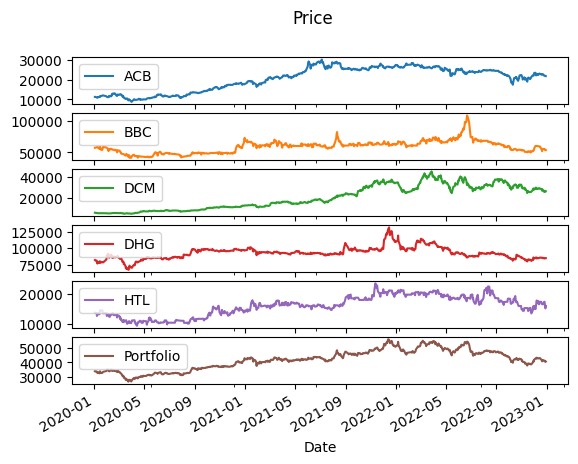

In [7]:
#Construct portfolio:
weight = np.repeat(1/5,5)
price['Portfolio'] = price.dot(weight)
#Plotting:
plt.figure(figsize=(10,15))
price.plot(subplots=True,title='Price')
plt.show()

<b><u>2. Return and risk:</u></b>
<br>
Calculate daily return and volatility of daily return for each stock as shown below, we can see DCM and HTL are two most volatile stock with standard deviations of daily returns are 3.25% and 3.45%, respectively. As result, standard deviation of portfolio's daily returns is 1.15%. Among 5 stocks, DCM has the highest growth rate as the price at Dec 30,2022 is 4 times of the price at Jan 02,2020. 

In [8]:
# Daily return
ret = price.pct_change().dropna()
print(5*"*" + "STOCKS & PORFOLIO'S DAILY RETURNS" +5*"*")
print(ret.head())
print(80*"-")
print(ret.tail())

*****STOCKS & PORFOLIO'S DAILY RETURNS*****
                 ACB       BBC       DCM       DHG       HTL  Portfolio
Date                                                                   
2020-01-03  0.000000  0.000000 -0.015189 -0.008699 -0.005238  -0.005114
2020-01-06 -0.021814  0.015405 -0.017238  0.000000 -0.005339   0.002786
2020-01-07  0.000000  0.001676 -0.017541 -0.021927 -0.069554  -0.016049
2020-01-08 -0.017696  0.000000 -0.028942 -0.035877  0.057527  -0.014815
2020-01-09  0.013511  0.000000 -0.008322  0.034892 -0.021744   0.015117
--------------------------------------------------------------------------------
                 ACB       BBC       DCM       DHG       HTL  Portfolio
Date                                                                   
2022-12-26 -0.034934  0.000000 -0.068345 -0.012850  0.051360  -0.014145
2022-12-27  0.000000  0.000000  0.019305  0.000000  0.000000   0.002432
2022-12-28 -0.004525 -0.030521  0.001894  0.007101 -0.068966  -0.011402
2022-12-29 

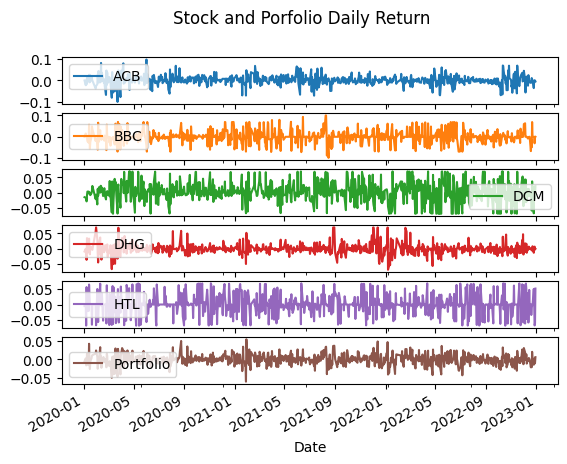

In [9]:
#Plotting daily returns:
ret.plot(subplots=True,title='Stock and Porfolio Daily Return')
plt.show()

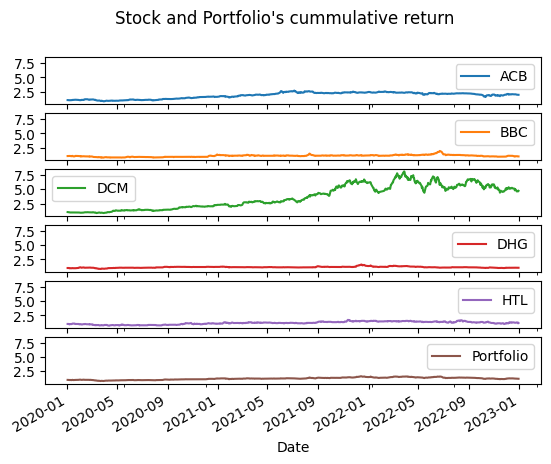

In [10]:
# Cummulative returns:
ret_cum = (1 + ret).cumprod()
ret_cum.plot(subplots=True,sharey=True,title='Stock and Portfolio\'s cummulative return')
plt.show()

In [11]:
#Daily volatility
ret_std = ret.std()
print(5*"*" + "STOCKS & PORFOLIO'S DAILY RETURNS" +5*"*")
print(ret_std)

*****STOCKS & PORFOLIO'S DAILY RETURNS*****
ACB          0.022064
BBC          0.029301
DCM          0.032482
DHG          0.017293
HTL          0.033493
Portfolio    0.014487
dtype: float64


<b><u>3. Sharpe Ratio and Sortino Ratio:</u></b>
<br>
We calculate annualized returns and annualized volatility to measure Sharpe ratio and Sortino ratio,i.e, risk-adjusted returns, for the porfolio.<br>
Using risk-free rate equals to 4.05% (<a href="https://thoibaotaichinhvietnam.vn/lai-suat-trai-phieu-chinh-phu-tiep-tuc-tang-116174.html#:~:text=V%E1%BB%81%20l%E1%BB%A3i%20su%E1%BA%A5t%20giao%20d%E1%BB%8Bch,%25%20v%C3%A0%204%2C05%25.">Link</a>) to calculate the 2 ratios, we have result as shown below. Sharpe ratio for portfolio is 8.70% while Sortino ratio is 12.98%. Those poor results are due to low risk-adjusted returns of the components: among 5 stock, only DCM has Sharpe and Sortino ratio above 1, BBC and DHG both have negative excess returns. 

In [12]:
#Annualized returns:
total_return = ret_cum.iloc[-1]
annual_return = (total_return)**(1/3)-1
#Annualized volatility
annual_std = ret_std*np.sqrt(250)

#Sharpe ratio:Risk-free rate = 4.05%
rfr = 0.0405
sharpe = (annual_return - rfr)/annual_std
#Sortino ratio:
neg_ret_ACB = ret.loc[ret['ACB']<0,'ACB']
neg_ACB_std = neg_ret_ACB.std()*np.sqrt(250)
sort_ACB = (annual_return['ACB']-rfr)/neg_ACB_std

neg_ret_BBC = ret.loc[ret['BBC']<0,'BBC']
neg_BBC_std = neg_ret_BBC.std()*np.sqrt(250)
sort_BBC = (annual_return['BBC']-rfr)/neg_BBC_std

neg_ret_DCM = ret.loc[ret['DCM']<0,'DCM']
neg_DCM_std = neg_ret_DCM.std()*np.sqrt(250)
sort_DCM = (annual_return['DCM']-rfr)/neg_DCM_std

neg_ret_DHG = ret.loc[ret['DHG']<0,'DHG']
neg_DHG_std = neg_ret_DHG.std()*np.sqrt(250)
sort_DHG = (annual_return['DHG']-rfr)/neg_DHG_std

neg_ret_HTL = ret.loc[ret['HTL']<0,'HTL']
neg_HTL_std = neg_ret_HTL.std()*np.sqrt(250)
sort_HTL = (annual_return['HTL']-rfr)/neg_HTL_std

neg_ret_port = ret.loc[ret['Portfolio']<0,'Portfolio']
neg_port_std = neg_ret_port.std()*np.sqrt(250)
sort_port = (annual_return['Portfolio']-rfr)/neg_port_std

#Result:
print(10*"*" + "RISK-ADJUSTED RETURNS" + 10*"*" + "\n")
sort = [sort_ACB,sort_BBC,sort_DCM,sort_DHG,sort_HTL,sort_port]
ra_ret_dict = {'annual_return':annual_return,'annual_std':annual_std,'sharpe':sharpe,'sortino':sort}
idx_list = ['ACB','BBC','DCM','DHG','HTL','Portfolio']
ra_ret  = pd.DataFrame(ra_ret_dict,index=idx_list)
print(ra_ret)

**********RISK-ADJUSTED RETURNS**********

           annual_return  annual_std    sharpe   sortino
ACB             0.245932    0.348869  0.588851  0.785171
BBC            -0.022363    0.463296 -0.135686 -0.181377
DCM             0.679278    0.513592  1.243748  1.854763
DHG             0.011340    0.273430 -0.106645 -0.163479
HTL             0.051916    0.529567  0.021558  0.030746
Portfolio       0.060433    0.229053  0.087023  0.129819


<b><u>4. Maximum drawdown:</u></b>
<br>
Choosing time inteval of 30 days, we calculate the maximum daily drawdown,i.e.the largest percentage loss of market price from peak to trough.<br>The visualization below shows the highest daily loss rate is about 23% at Q2 2020, the maximum loss rates over 2022 are over 15%. 

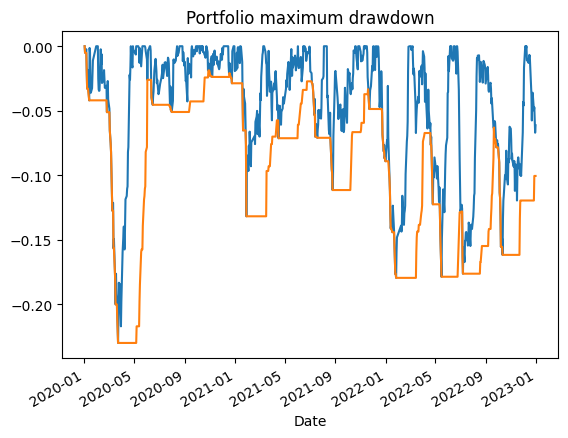

In [13]:
#Maximum drawdown:
roll_max = price.rolling(min_periods=1,window=30).max()
daily_drawdown = price/roll_max-1.0
max_daily_drawdown = daily_drawdown.rolling(min_periods=1,window=30).min()

daily_drawdown['Portfolio'].plot()
max_daily_drawdown['Portfolio'].plot()
plt.title('Portfolio maximum drawdown')
plt.show()

<b><u>5. VaR and CVaR:</u></b>
<br>
To measure 99% daily Value-at-Risk(VaR) and Expected Shortfall or Conditional Value-at-Risk (CVaR) of the portfolio, we will use 3 approaches:
<ul>
    <li>Historical simulation;</li>
    <li>Monte-Carlo simulation;</li>
    <li>Generalized Extreme Value Distribution</li>

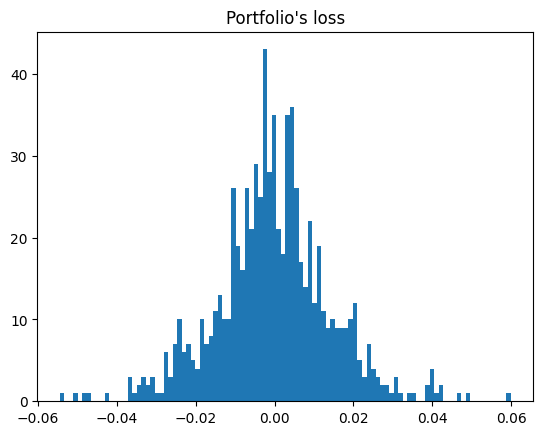

In [14]:
losses = -ret[['Portfolio']]
#Plotting losses
plt.hist(losses,bins=100)
plt.title('Portfolio\'s loss')
plt.show()

<b>a. Historical simulation:</b>
<br>
We use the 3-year historical loss to predict future loss, assuming the future distribution of losses is exactly the same as the past.<br>
As shown below, there is 1% probability that the portfolio will have a larger loss than 4.02% in one-day period and when it is greater than 4.02%, the expected loss is 4.52%.

In [16]:
VaR_99_hist = round(np.quantile(losses,0.99),4)
CVaR_99_hist = round(losses[losses['Portfolio']>=VaR_99_hist].mean(),4)
print('99% daily VaR is {}, 99% daily CVaR is {}'.format(VaR_99_hist,CVaR_99_hist))

99% daily VaR is 0.0402, 99% daily CVaR is Portfolio    0.0452
dtype: float64


<b>b. Monte-Carlo simulation:</b>
<br>
We take random draw from assuming normal distribution for each minute loss of the 5 components to calculate the portfolio's daily loss and then measure 99% daily VaR and CVaR.<br>
As shown below, there is 1% probability that the portfolio will have a larger loss than 0.22% in one-day period and when it is greater than 0.22%, the expected loss is 0.24%.

In [23]:
from scipy.stats import norm
mu = ret.iloc[:,:-1].mean()
e_cov = ret.iloc[:,:-1].cov()

steps = 24*60
n = 10000
daily_losses = np.zeros((5,n))

for i in range(n):
    correlated_randomness = e_cov@norm.rvs(size=(5,steps))
    minute_losses = (correlated_randomness*np.sqrt(1/steps)).add(mu/steps,axis=0)
    daily_losses[:,i] = minute_losses.sum(axis=1)

port_loss = weight@daily_losses
VaR_99 = round(np.quantile(port_loss,0.99),4)
CVaR_99 = round(port_loss[port_loss>=VaR_99].mean(),4)
print('99% 1-day VaR is {}, 99% 1-day CVaR is {}'.format(VaR_99,CVaR_99))


99% 1-day VaR is 0.0022, 99% 1-day CVaR is 0.0024


<b>c. Generalized Extreme Value Distribution:</b>
<br>
The concept of this approach is model losses based on the distribution of tail losses,i.e. extreme values. We take the Generalized Extreme Value Distribution to fit maximum daily losses in one-month period and then figure out 99% daily VaR and CVaR.<br>
As shown below, there is 1% probability that the portfolio will have a larger loss than 45.2% in one-day period and when it is greater than 45.2%, the expected loss is 178.8%. Highly fluctuating stock market with large loss during 3 years may be the reason for these exceptional values.

In [18]:
from scipy.stats import genextreme

maxima = losses.resample('M').max().dropna()
params = genextreme.fit(maxima)

VaR_99 = genextreme.ppf(0.99,*params)
CVaR_99 = (1/(1-0.99)) * genextreme.expect(lambda x: x, args=[params[0],], loc=params[1], scale=params[2], lb=VaR_99)
print('99% 1-day VaR is {}, 99% 1-day CVaR is {}'.format(VaR_99,CVaR_99))

99% 1-day VaR is 0.4515687894504732, 99% 1-day CVaR is 1.7883239694878288
